In [1]:
from astroquery.skyview import SkyView
from astroquery.mast import Observations
from astroquery.vizier import Vizier
from astropy.wcs import WCS
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import cv2
import numpy as np
from astropy.io import fits
import os
import pandas as pd
import requests
import json

In [2]:
# List available surveys
surveys = SkyView.list_surveys()
print(surveys)

{'Allbands:GOODS/HDF/CDF': ['GOODS: Chandra ACIS HB',
                            'GOODS: Chandra ACIS FB',
                            'GOODS: Chandra ACIS SB',
                            'GOODS: VLT VIMOS U',
                            'GOODS: VLT VIMOS R',
                            'GOODS: HST ACS B',
                            'GOODS: HST ACS V',
                            'GOODS: HST ACS I',
                            'GOODS: HST ACS Z',
                            'Hawaii HDF U',
                            'Hawaii HDF B',
                            'Hawaii HDF V0201',
                            'Hawaii HDF V0401',
                            'Hawaii HDF R',
                            'Hawaii HDF I',
                            'Hawaii HDF z',
                            'Hawaii HDF HK',
                            'GOODS: HST NICMOS',
                            'GOODS: VLT ISAAC J',
                            'GOODS: VLT ISAAC H',
                            'GOODS: 

In [3]:
# Define the coordinates for the Eagle Nebula Pillars of Creation
coords = SkyCoord('18h18m48s -13d49m00s', frame='icrs')
# Track the name of the object
object_name = 'Eagle Nebula Pillars of Creation'

In [4]:
# # Define the coordinates for the M87 Black Hole
# coords = SkyCoord('12h30m49.42338s +12°23m28.0439s', frame='icrs')
# # Track the name of the object
# object_name = 'M87 Black Hole'

In [5]:
# # Define the coordinates for the Crab Nebula
# coords = SkyCoord('05h34m31.94s +22d00m52.2s', frame='icrs')
# # Track the name of the object
# object_name = 'Crab Nebula'

In [6]:
# # Define the coordinates for the Orion Nebula
# coords = SkyCoord('05h35m17.3s -05d23m28s', frame='icrs')
# # Track the name of the object
# object_name = 'Orion Nebula'

In [7]:
# Fetch an image from SkyView
# image_list = SkyView.get_images(position=coords, survey=['DSS'], radius=0.1 * u.deg)
# image_list = SkyView.get_images(position=coords, survey=['DSS'], radius=0.25 * u.deg)
# image_list = SkyView.get_images(position=coords, survey=['DSS'], radius=0.5 * u.deg)
# image_list = SkyView.get_images(position=coords, survey=['DSS'], radius=1 * u.deg)

image_list = SkyView.get_images(position=coords, survey=['DSS1 Blue'], radius=0.25 * u.deg)
# image_list = SkyView.get_images(position=coords, survey=['DSS1 Red'], radius=0.25 * u.deg)
# image_list = SkyView.get_images(position=coords, survey=['DSS2 Blue'], radius=0.25 * u.deg)
# image_list = SkyView.get_images(position=coords, survey=['DSS2 Red'], radius=0.25 * u.deg)

image_hdu = image_list[0][0]
image = image_list[0][0].data

In [138]:
# Testing based off maps at this link:
# https://archive.stsci.edu/pub/hlsp/goods/v2/h_goods_v2.0_rdm.html


# # Define the central coordinates for GOODS-North and GOODS-South fields
# coords_north = SkyCoord('12h37m15s +62d16m30s', frame='icrs')
# coords_south = SkyCoord('03h32m30s -27d46m30s', frame='icrs')

# # List of Hubble filters to try
# hubble_filters = [
#     'GOODS: HST ACS B',  # F435W
#     'GOODS: HST ACS V',  # F606W
#     'GOODS: HST ACS I',  # F775W
#     'GOODS: HST ACS Z',  # F850LP
#     'GOODS: HST NICMOS'  # Near-infrared
# ]

# # Function to fetch and display images for given coordinates
# def fetch_and_display_images(coords, field_name):
#     for survey in hubble_filters:
#         try:
#             print(f"Trying survey: {survey} for {field_name}")
#             image_list = SkyView.get_images(position=coords, survey=[survey], radius=0.05 * u.deg, pixels=1000)
#             image_hdu = image_list[0][0]
#             image = image_hdu.data
#             print(f"Successfully fetched image from survey: {survey} for {field_name}")
            
#             # Display the image
#             wcs = WCS(image_hdu.header)
#             fig = plt.figure(figsize=(10, 10), dpi=150)
#             ax = fig.add_subplot(111, projection=wcs)
#             ax.imshow(image, cmap='gray', origin='lower', vmin=np.percentile(image, 5), vmax=np.percentile(image, 95))
#             ax.set_title(f'High Resolution Sky Image - {survey} ({field_name})')
#             ax.set_xlabel('RA')
#             ax.set_ylabel('Dec')
#             ax.grid(color='white', ls='dotted')
#             plt.show()
            
#         except Exception as e:
#             print(f"Failed to fetch image from survey: {survey} for {field_name}. Error: {e}")

# # Fetch and display images for GOODS-North and GOODS-South fields
# fetch_and_display_images(coords_north, "GOODS-North")
# fetch_and_display_images(coords_south, "GOODS-South")

In [139]:
# def jwst_nircam_search(target_name, radius="0.1 deg"):
#     # Search for JWST observations
#     obs_table = Observations.query_object(target_name, radius=radius)

#     # Filter for JWST observations
#     jwst_obs_table = obs_table[obs_table['obs_collection'] == 'JWST']

#     # Print the results
#     print(jwst_obs_table)

#     # Download the first observation
#     if len(jwst_obs_table) > 0:
#         data_products = Observations.get_product_list(jwst_obs_table[0])
#         manifest = Observations.download_products(data_products[0:1], mrp_only=False)
#         fits_file = manifest['Local Path'][0]

#         # Open and display the FITS file
#         with fits.open(fits_file) as hdul:
#             image_data = hdul[1].data  # JWST images are typically in the second HDU
#             print(f"Image data shape: {image_data.shape}")
            
#             # Check if the data is 3D and select the first slice if necessary
#             if len(image_data.shape) == 3:
#                 image_data = image_data[0]
            
#             # Normalize the image data
#             norm_image_data = (image_data - np.min(image_data)) / (np.max(image_data) - np.min(image_data))
            
#             # Display the image with different color maps and contrast adjustments
#             plt.figure(figsize=(20, 20))
#             plt.imshow(norm_image_data, cmap='viridis', origin='lower', vmin=np.percentile(norm_image_data, 5), vmax=np.percentile(norm_image_data, 95))
#             plt.colorbar()
#             plt.title(f"JWST Image of {target_name}")
#             plt.show()
#     else:
#         print("No JWST observations found for the specified target.")

# # Perform the JWST NIRCam search with adjustable radius
# target_name = "NGC 3324"  # Example target, replace with your target of interest
# radius = "0.05 deg"  # Adjust the radius as needed
# jwst_nircam_search(target_name, radius)

In [140]:
# Create a folder for the object with the name of the object with underscores instead of spaces
object_name = object_name.replace(' ', '_')
os.makedirs(f'images/{object_name}', exist_ok=True)

In [141]:
# Save the image as a FITS file
fits_file_path = f'images/{object_name}/{object_name}.fits'
hdu = fits.PrimaryHDU(image)
hdul = fits.HDUList([hdu])
hdul.writeto(fits_file_path, overwrite=True)

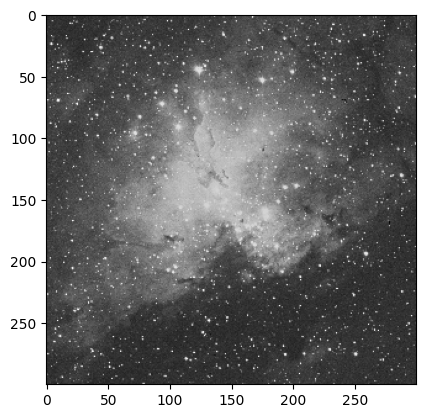

In [8]:
# Display the image
plt.imshow(image, cmap='gray')

In [143]:
# # Download the image in all available color maps to the object folder
# for cmap in plt.colormaps():
#     plt.imsave(f'images/{object_name}/{object_name}_{cmap}.png', image, cmap=cmap)

In [144]:
# # Visualize al color maps in a single image
# fig, ax = plt.subplots(1, 1, figsize=(12, 12))
# for i, cmap in enumerate(plt.colormaps()):
#     ax.imshow(image, cmap=cmap)
#     ax.set_title(cmap)
#     plt.axis('off')
#     plt.savefig(f'images/{object_name}/All_cmaps__{object_name}.png')

In [145]:
image_hdu.header

SIMPLE  =                    T / Written by SkyView Thu Oct 03 02:40:00 EDT 2024
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  300 / Width of image                                 
NAXIS2  =                  300 / Height of image                                
CRVAL1  =              83.8221 / Reference longitude                            
CRVAL2  =             -5.39112 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                150.5 / X reference pixel                              
CRPIX2  =                150

In [9]:
# Extract WCS information
wcs = WCS(image_hdu.header)

# Display the image with WCS projection and grid
fig = plt.figure(figsize=(14, 14), dpi=600)
ax = fig.add_subplot(111, projection=wcs)
ax.imshow(image_hdu.data, cmap='gray', origin='lower')
ax.set_title(f'{object_name}')
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.grid(color='white', ls='dotted')


# # Display the image without WCS projection
# plt.imshow(image, cmap='gray')
# plt.title('Sky Image')
# plt.xlabel('RA')
# plt.ylabel('Dec')
# plt.show()

: 

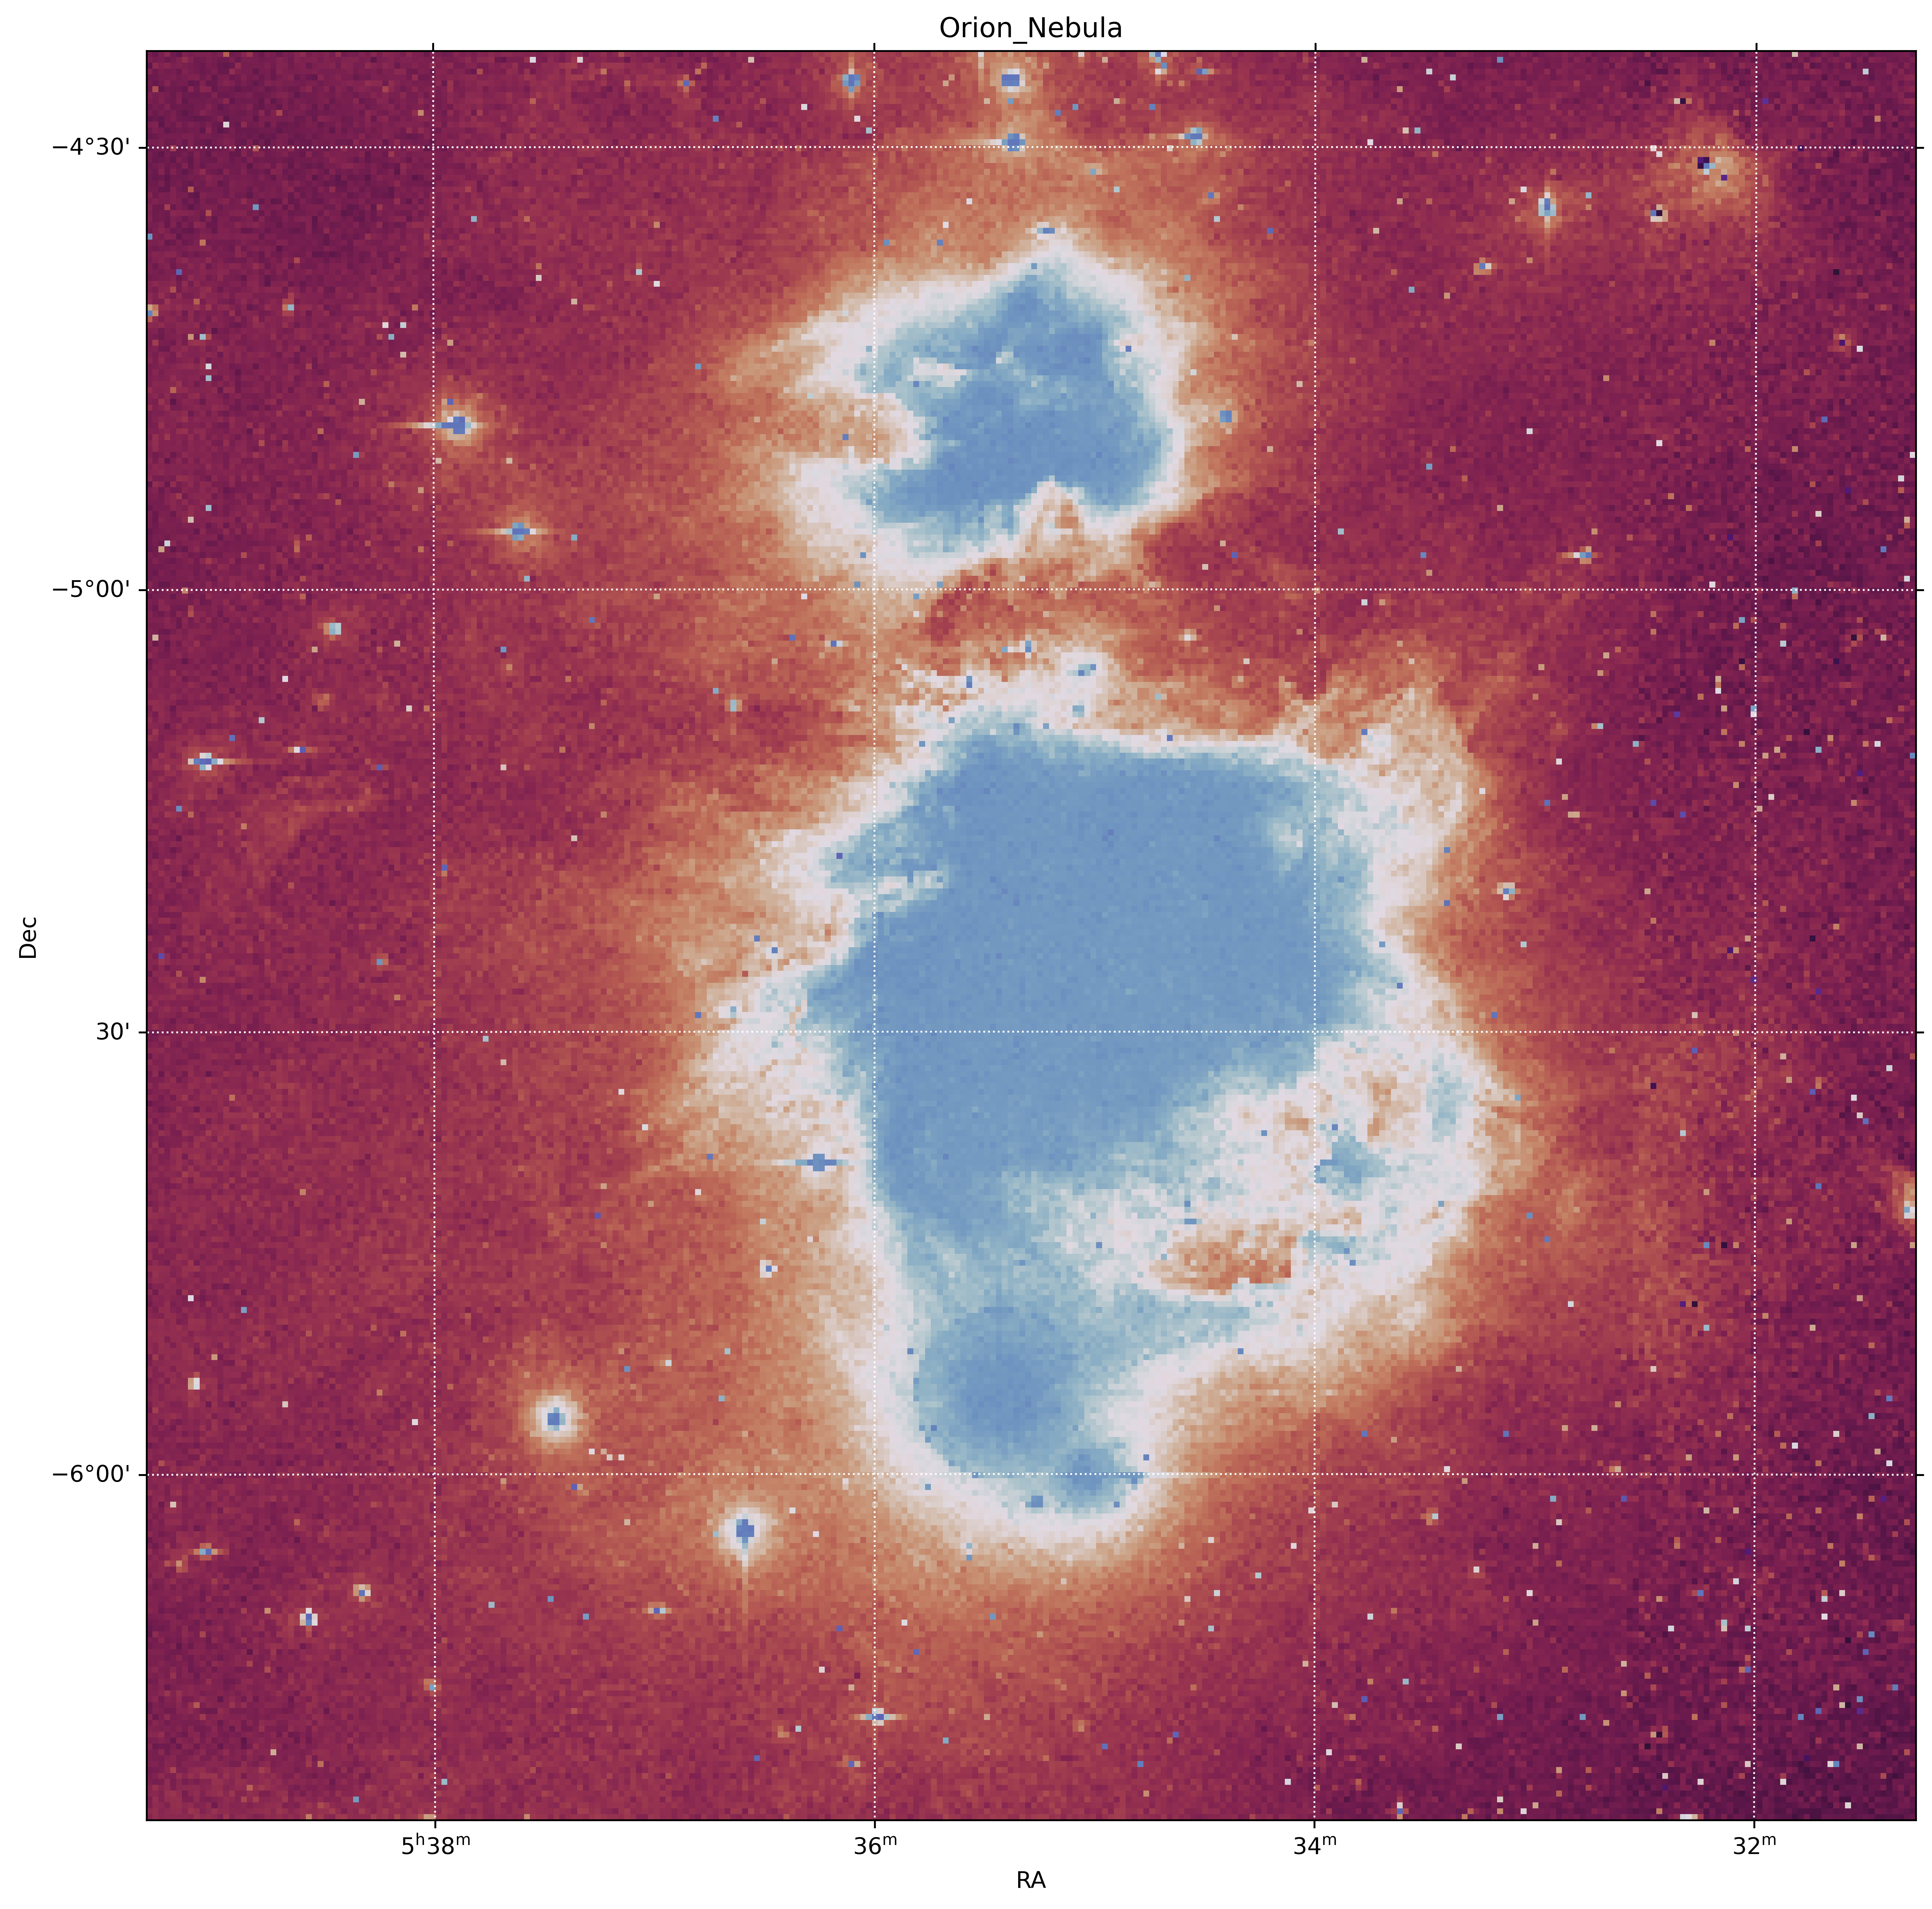

In [147]:
# Display the image with WCS projection and grid
fig = plt.figure(figsize=(14, 14), dpi=600)
ax = fig.add_subplot(111, projection=wcs)
ax.imshow(image_hdu.data, cmap='twilight_shifted_r', origin='lower')
ax.set_title(f'{object_name}')
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.grid(color='white', ls='dotted')

In [148]:
# Fetch star data from Vizier using the 2MASS catalog
v = Vizier(columns=['*'])
catalog_list = v.query_region(coords, radius=0.4 * u.deg, catalog='II/246')
catalog = catalog_list[0]

# Convert the table to a pandas DataFrame for easier manipulation
catalog = catalog.to_pandas()
print(catalog)

# Save the catalog as a CSV file
catalog.to_csv(f'images/{object_name}/2MASS_catalog_{object_name}.csv', index=False)

      RAJ2000   DEJ2000            _2MASS       Jmag  e_Jmag       Hmag  \
0   83.926666 -5.764996  05354239-0545539  15.947000   0.070  14.808000   
1   83.939337 -5.762861  05354544-0545462  16.957001   0.168  16.218000   
2   83.944420 -5.770996  05354666-0546155  15.880000   0.066  14.619000   
3   83.995675 -5.750751  05355896-0545027  17.045000   0.180  15.653000   
4   83.987092 -5.755309  05355690-0545191  12.572000   0.024  11.446000   
5   83.947658 -5.752965  05354743-0545106  14.128000   0.028  12.978000   
6   83.961580 -5.739012  05355077-0544204  17.885000     NaN  15.810000   
7   83.954248 -5.745228  05354901-0544428  16.822001     NaN  16.263000   
8   83.984311 -5.730977  05355623-0543515  16.201000   0.087  15.590000   
9   83.975187 -5.741468  05355404-0544292  16.215000   0.092  15.624000   
10  83.975095 -5.727912  05355402-0543404  17.450001   0.263  15.959000   
11  83.972687 -5.744310  05355344-0544395  14.435000   0.032  13.790000   
12  83.987462 -5.729112  

In [149]:
# Fetch star data from Vizier using the Hipparcos catalog
v = Vizier(columns=['*'])
catalog_list = v.query_region(coords, radius=2 * u.deg, catalog='I/239/hip_main')
catalog = catalog_list[0]

# Covnert the table to a pandas DataFrame for easier manipulation
catalog = catalog.to_pandas()
print(catalog)

# Save the catalog as a CSV file
catalog.to_csv(f'images/{object_name}/Hipparcos_catalog_{object_name}.csv', index=False)

      HIP        RAhms        DEdms   Vmag     RAICRS    DEICRS         Plx  \
0   25636  05 28 33.23  -04 41 49.3   7.48  82.138455 -4.697014    3.900000   
1   25669  05 28 58.37  -04 42 02.0  10.23  82.243205 -4.700547    4.280000   
2   25673  05 29 00.89  -04 41 32.7  11.16  82.253692 -4.692404    0.320000   
3   25681  05 29 05.83  -06 38 05.6   8.74  82.274309 -6.634890    2.370000   
4   25686  05 29 06.85  -05 26 41.5   7.53  82.278530 -5.444859    2.370000   
5   25691  05 29 08.92  -05 47 27.6   7.96  82.287178 -5.791003    2.560000   
6   25770  05 30 10.35  -05 12 05.8   8.65  82.543133 -5.201616    3.270000   
7   25804  05 30 42.98  -05 29 26.9   9.02  82.679098 -5.490792    4.230000   
8   25830  05 30 52.93  -04 15 16.8   7.54  82.720536 -4.254662    4.360000   
9   25841  05 31 00.12  -06 11 28.8   8.17  82.750480 -6.191336    4.380000   
10  25849  05 31 04.70  -03 56 00.4   9.50  82.769595 -3.933456    2.530000   
11  25863  05 31 18.41  -05 42 13.5   9.46  82.82669

In [150]:
# Example preprocessing steps
# Normalize the image
normalized_image = (image - np.min(image)) / (np.max(image) - np.min(image))

In [151]:
# Extract star positions and magnitudes
star_positions = np.array([stars['RAJ2000'], stars['DEJ2000']]).T
star_magnitudes = stars['Vmag']

NameError: name 'stars' is not defined

In [ ]:
# Save preprocessed data for further analysis
np.save('preprocessed_image.npy', normalized_image)
star_data = pd.DataFrame({'RA': stars['RAJ2000'], 'Dec': stars['DEJ2000'], 'Magnitude': stars['Vmag']})
star_data.to_csv('preprocessed_star_data.csv', index=False)

In [ ]:
# Save the image using OpenCV
cv2.imwrite('sky_image.png', image)